## Task 2 : Clasification of emotion of videos into happy,  sad,  angry and neutral
## Violent and Non-Violent videos
As per papaer by alan,
### 1.Value of valance v and arousal a  = Levels of excitement and positiveness of video segment.
### 2.The overall Affective labels is derived from the areas in the 2D affect space trained by the affect curve.
### 3.Therefore we don't need particular labels , but the values ov v and a is sufficient

### A+ and V- = Nervous, Angry, Annoyed
### A+ and V+ = Pleased, happy, Excited
### A- and V- = Sad, Bored, Sleepy
### A- and V+ is Relaxed, Peaceful, Calm

### Violent video = A+, A- and V-
### Non-Violent video = A+ , A- and V+

We need to classify the video as violent and non-violent based on the features extracted.
Do normalize the values of valance and arousal

In [2]:
#import files
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, precision_score, auc, precision_recall_curve, accuracy_score, f1_score, confusion_matrix, average_precision_score
from sklearn.base import clone
import pickle
from sklearn import tree
from sklearn.metrics import accuracy_score

C:\Users\Nivedita Prasad\Anaconda3\envs\py36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


##### Read all the csv files and Familirization

In [3]:
#read arousal
featuresArousal_TAC2015 = pd.read_csv('ACCEDEfeaturesArousal_TAC2015.csv')
featuresArousal_TAC2015_temp =featuresArousal_TAC2015.drop('id',axis=1)
featuresArousal_TAC2015_temp = featuresArousal_TAC2015_temp.drop('name' ,axis=1)

In [3]:
#read valance
featuresValence_TAC2015 = pd.read_csv('ACCEDEfeaturesValence_TAC2015.csv')
featuresValence_TAC2015_temp =featuresValence_TAC2015.drop('id',axis=1)
featuresValence_TAC2015_temp = featuresValence_TAC2015_temp.drop('name' ,axis=1)

In [5]:
#read ACCEDEviolence - labels
ACCEDEviolence = pd.read_csv('ACCEDEviolence.csv')
ACCEDEviolence_temp =ACCEDEviolence.drop('id',axis=1)
ACCEDEviolence_temp = ACCEDEviolence_temp.drop('name' ,axis=1)
ACCEDEviolence_temp.head()

,violence
0,0
1,0
2,0
3,0
4,0


In [6]:
ACCEDEviolence_temp.violence.value_counts()
#0    9360
#1     440

0    9360
1     440
Name: violence, dtype: int64

In [7]:
#read ranking
ACCEDEranking = pd.read_csv('ACCEDEranking.csv')
ACCEDEranking.head()
ACCEDEranking_temp = ACCEDEranking.drop('id' ,axis=1)
ACCEDEranking_temp = ACCEDEranking_temp.drop('name' ,axis=1)

valenceValue = ACCEDEranking_temp['valenceValue'].values
arousalValue = ACCEDEranking_temp['arousalValue'].values
#valenceValue #array
#len(valenceValue) #9800
print(ACCEDEranking_temp.head(5))

#0    4900
#1    2450
#2    2450

   valenceRank  arousalRank  valenceValue  arousalValue  valenceVariance  \
0         3755          787      2.764340      1.366938         0.118453   
1         6711         6428      3.260093      2.792376         0.104211   
2         5043         3591      3.047528      1.840160         0.109841   
3         7584         5615      3.338461      2.470821         0.100953   
4         5014         4463      3.042496      2.082151         0.110000   

   arousalVariance  
0         0.148906  
1         0.154526  
2         0.149310  
3         0.164621  
4         0.163321  


In [8]:
ACCEDEranking_temp.head(5)

,valenceRank,arousalRank,valenceValue,arousalValue,valenceVariance,arousalVariance
0,3755,787,2.764340,1.366938,0.118453,0.148906
1,6711,6428,3.260093,2.792376,0.104211,0.154526
2,5043,3591,3.047528,1.840160,0.109841,0.149310
3,7584,5615,3.338461,2.470821,0.100953,0.164621
4,5014,4463,3.042496,2.082151,0.110000,0.163321


### Normalizing and Creating training and Test set 

In [9]:
labels = ACCEDEviolence_temp.violence
## convert to numpy array
labels = np.array(labels)

In [10]:
## create train test split
print ("Splitting train and test dataset")
X_train_fa, X_test_fa, y_train_fa, y_test_fa = train_test_split(featuresArousal_TAC2015_temp, labels,test_size=0.40, random_state=0)
scaler = MinMaxScaler()
X_train_fa = scaler.fit_transform(X_train_fa)
X_test_fa = scaler.transform(X_test_fa)

## apply SMOTE to the training set
print ("Applying SMOTE to the training set to balance violent and non-violent classes")
intended_ratio = 0.3
original_num_non_violent = len([x for x in y_train_fa if x == 0])
sm = SMOTE(random_state=12, ratio={1:int(intended_ratio * original_num_non_violent)})
X_train_res, y_train_res = sm.fit_sample(X_train_fa, y_train_fa)


Splitting train and test dataset
Applying SMOTE to the training set to balance violent and non-violent classes


In [11]:
## create classifiers
knn = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression(C=500, penalty='l1', random_state=12)
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1, max_depth=10, random_state=12)

## create dictionary to store values
clf_dict = {"knn": {"clf": knn}, "lr": {"clf": lr}, "rf": {"clf": rf}}


Benchmark between classifiers..
KNN
Without SMOTE
Precision:  0.36538461538461536
Recall:  0.10795454545454546
F1 Score:  0.16666666666666666
AUC:  0.646547354555167
With SMOTE
Precision:  0.16876574307304787
Recall:  0.3806818181818182
F1 Score:  0.2338568935427574
AUC:  0.6724425747863249

LR
Without SMOTE
Precision:  0.14285714285714285
Recall:  0.005681818181818182
F1 Score:  0.01092896174863388
AUC:  0.7473654817404818
With SMOTE
Precision:  0.1693121693121693
Recall:  0.18181818181818182
F1 Score:  0.17534246575342466
AUC:  0.7542143186674436

RF
Without SMOTE
Precision:  1.0
Recall:  0.005681818181818182
F1 Score:  0.01129943502824859
AUC:  0.7878226374320125
With SMOTE
Precision:  0.46153846153846156
Recall:  0.17045454545454544
F1 Score:  0.24896265560165975
AUC:  0.8199558687839937

Plotting the ROCs..


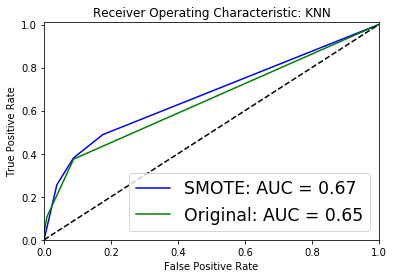

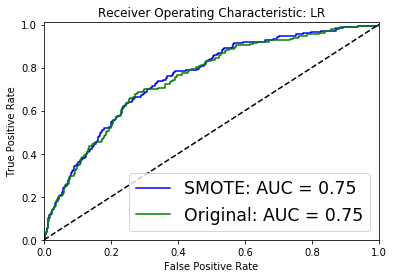

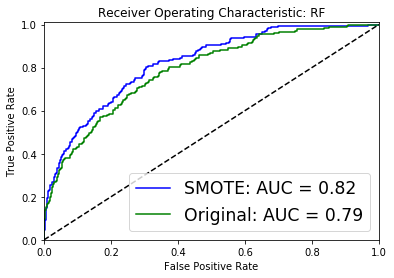

In [12]:
print ("Benchmark between classifiers..")
for k,v in clf_dict.items():
    ## train using original dataset
    print (k.upper())
    print ("Without SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_fa, y_train_fa)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['non-smote'] = {}
    v['non-smote']['fpr'] = fpr
    v['non-smote']['tpr'] = tpr
    v['non-smote']['thresholds'] = thresholds
    v['non-smote']['auc'] = auc_score
    v['non-smote']['recall'] = recall
    v['non-smote']['precision'] = precision
    ## train using SMOTE
    print ("With SMOTE")
    clf = clone(v['clf'])
    clf.fit(X_train_res, y_train_res)
    pred_proba = clf.predict_proba(X_test_fa)[:,1]
    pred = clf.predict(X_test_fa)
    fpr, tpr, thresholds = roc_curve(y_test_fa, pred_proba, pos_label=1)
    auc_score = auc(fpr, tpr)
    print ("Precision: ", precision_score(y_test_fa, pred))
    print ("Recall: ", recall_score(y_test_fa, pred))
    print ("F1 Score: ", f1_score(y_test_fa, pred))
    print ("AUC: ", auc_score)
    precision, recall, _ = precision_recall_curve(y_test_fa, pred_proba)
    v['smote'] = {}
    v['smote']['fpr'] = fpr
    v['smote']['tpr'] = tpr
    v['smote']['thresholds'] = thresholds
    v['smote']['auc'] = auc_score
    v['smote']['recall'] = recall
    v['smote']['precision'] = precision
    print ("")

## save the result to a pickle file    
# if it's already there uncoment the following two lines
# with open('imbalance_task_result.pickle', 'rb') as handle:
#    clf_dict = pickle.load(handle)
with open('imbalance_task_result.pickle', 'wb') as handle:
    pickle.dump(clf_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

# plot the ROCs
print ("Plotting the ROCs..")
for k in clf_dict.keys():
    plt.title('Receiver Operating Characteristic: ' + k.upper())

    plt.plot(clf_dict[k]['smote']['fpr'], clf_dict[k]['smote']['tpr'], 'b',label='SMOTE: AUC = %0.2f'% clf_dict[k]['smote']['auc'])
    plt.plot(clf_dict[k]['non-smote']['fpr'], clf_dict[k]['non-smote']['tpr'], 'g',label='Original: AUC = %0.2f'% clf_dict[k]['non-smote']['auc'])

    plt.legend(loc='lower right', fontsize="xx-large")
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0,1.0])
    plt.ylim([0,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


